<a href="https://colab.research.google.com/github/mxn04420/Assignment-3/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
np.random.seed(7)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
sgd = SGD(learning_rate=0.01, momentum=0.9, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

170498071/170498071 [==============================] - 3s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               

In [2]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1563/1563 [==============================] - 299s 191ms/step - loss: 1.7101 - accuracy: 0.3795 - val_loss: 1.4231 - val_accuracy: 0.4857
Epoch 2/5
1563/1563 [==============================] - 284s 182ms/step - loss: 1.3711 - accuracy: 0.5097 - val_loss: 1.2040 - val_accuracy: 0.5730
Epoch 3/5
1563/1563 [==============================] - 256s 164ms/step - loss: 1.2049 - accuracy: 0.5708 - val_loss: 1.1271 - val_accuracy: 0.5882
Epoch 4/5
1563/1563 [==============================] - 256s 164ms/step - loss: 1.0723 - accuracy: 0.6224 - val_loss: 1.0191 - val_accuracy: 0.6380
Epoch 5/5
1563/1563 [==============================] - 257s 164ms/step - loss: 0.9693 - accuracy: 0.6580 - val_loss: 0.9938 - val_accuracy: 0.6497


In [3]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 64.97%


In [4]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils
from keras.optimizers import SGD

np.random.seed(7)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#normalizing input data from 0-255 to 0.0-1.0
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

#one hot encoding the outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

#creating the model and adding layers as per requirement
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

#running the model
epochs = 5
learning_rate = 0.01
decay_rate = learning_rate / epochs
sgd = SGD(lr=learning_rate, momentum=0.9, decay=decay_rate, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

#testing the model against test data
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

#calculating accuracy of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 64)        0         
                                                      

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


None
Epoch 1/5
1563/1563 [==============================] - 487s 311ms/step - loss: 1.8912 - accuracy: 0.3001 - val_loss: 1.6293 - val_accuracy: 0.4023
Epoch 2/5
1563/1563 [==============================] - 485s 310ms/step - loss: 1.5329 - accuracy: 0.4356 - val_loss: 1.3877 - val_accuracy: 0.4944
Epoch 3/5
1563/1563 [==============================] - 485s 310ms/step - loss: 1.3856 - accuracy: 0.4955 - val_loss: 1.2843 - val_accuracy: 0.5348
Epoch 4/5
1563/1563 [==============================] - 485s 310ms/step - loss: 1.3025 - accuracy: 0.5295 - val_loss: 1.2395 - val_accuracy: 0.5538
Epoch 5/5
1563/1563 [==============================] - 486s 311ms/step - loss: 1.2374 - accuracy: 0.5520 - val_loss: 1.1667 - val_accuracy: 0.5870
Accuracy: 58.70%


In [9]:
#predicting the first 4 images of the test data
predictions = model.predict(X_test[:4])

predicted_labels = np.argmax(predictions, axis=1)
actual_labels = np.argmax(y_test[:4], axis=1)

#printing the predicted and actual labels for the first 4 images
print("Predicted labels:", predicted_labels)
print("Actual labels:   ", actual_labels)

1/1 [==============================] - 0s 49ms/step
Predicted labels: [3 8 8 8]
Actual labels:    [3 8 8 0]


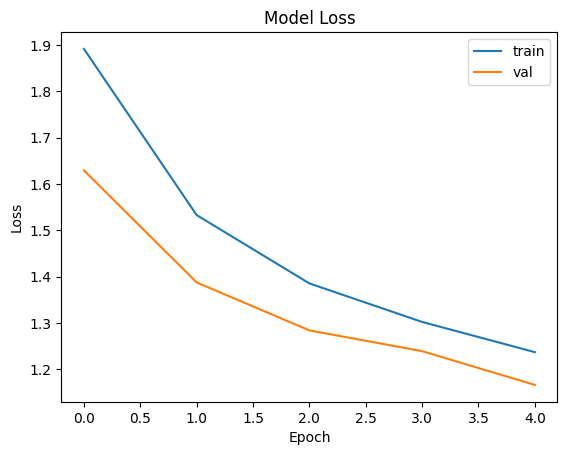

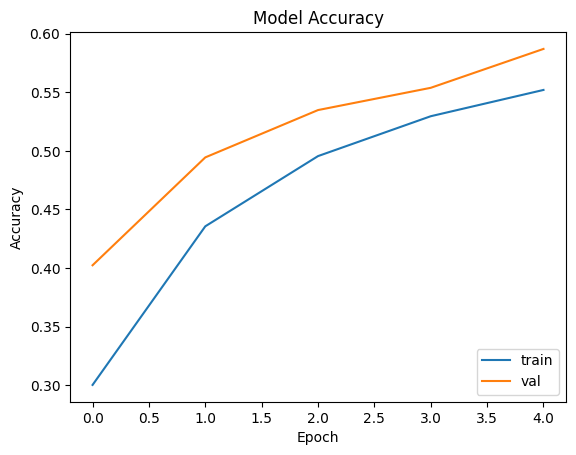

In [10]:
import matplotlib.pyplot as plt

#plotting the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

#plotting the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()